#### Identitas:

In [1]:
print('NAMA:')
print('SM.RASIDIN')
print('')
print('NOMOR PESERTA:')
print('2005023')

NAMA:
SM.RASIDIN

NOMOR PESERTA:
2005023


#### Lakukan 11 instruksi di bawah ini dengan menggunakan dataset berikut:
Catatan: Anda bebas menambah/mengedit kode dalam melakukan instruksi.

In [2]:
#Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, LabelBinarizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

In [3]:
#Reading datasets
#main dataset
df = pd.read_csv('../data/covid_19_data.csv')
#region and climate dataset
df_cat = pd.read_csv('../data/covid_19_data_cat.csv')

In [4]:
df.head()

,date,province,country,confirmed,deaths,recovered
0,2020-01-22,Anhui,Mainland China,1,0,0
1,2020-01-22,Beijing,Mainland China,14,0,0
2,2020-01-22,Chongqing,Mainland China,6,0,0
3,2020-01-22,Fujian,Mainland China,1,0,0
4,2020-01-22,Gansu,Mainland China,0,0,0


In [5]:
df_cat.head()

,country,region,climate
0,Afghanistan,Asia & Pacific,nontropic
1,Albania,Europe,nontropic
2,Algeria,Arab States,nontropic
3,Andorra,Europe,nontropic
4,Angola,Africa,tropic


#### 1. Dataframe 'df' terdiri dari (a) ... columns dan (b) ... rows. Dataframe 'df' mengandung data dari (c) ... 'country' yang berbeda. Dataframe 'df' mengandung data hasil observasi selama (d) .... hari terhitung sejak tanggal (e) ... sampai tanggal (f) ...

(a)
<br>
(b)
<br>
(c)
<br>
(d)
<br>
(e)
<br>
(f)

In [6]:
print(df.shape[1], "columns", df.shape[0], "rows")
print(df['country'].unique().size, "countries")
print(df['date'].unique().size, "days")
print(df['date'].sort_values()[0], "to",df['date'].sort_values()[len(df)-1])

6 columns 15131 rows
220 countries
84 days
2020-01-22 to 2020-04-14


#### 2. Ubah beberapa data pada kolom 'country' agar tidak ada nama berbeda untuk negara yang sama dengan aturan:
'original data','replace with this data':
<br>
"('St. Martin',)",'St. Martin'
<br>
' Azerbaijan','Azerbaijan'
<br>
'Cabo Verde','Cape Verde'
<br>
'Congo (Brazzaville)','Congo'
<br>
'Congo (Kinshasa)','Congo'
<br>
'North Ireland','Ireland'
<br>
'North Macedonia','Macedonia'
<br>
'occupied Palestinian territory','Palestine'
<br>
'Holy See','Vatican'
<br>
'Republic of Ireland','Ireland'
<br>
'The Bahamas','Bahamas'
<br>
'The Gambia','Gambia'
<br>
'Bahamas, The','Bahamas'
<br>
'Gambia, The','Gambia'
<br>
'Vatican City','Vatican'
<br>
'East Timor','Timor-Leste'
<br>
'West Bank and Gaza','Palestine'
<br>
'MS Zaandam','Others'
<br>
'Diamond Princess','Others'

In [7]:
country_map = {"('St. Martin',)": 'St. Martin', ' Azerbaijan': 'Azerbaijan', 'Cabo Verde':'Cape Verde', 'Congo (Brazzaville)': 'Congo',
 'Congo (Kinshasa)': 'Congo', 'North Ireland': 'Ireland', 'North Macedonia': 'Macedonia',
 'occupied Palestinian territory':'Palestine',  'Holy See' : 'Vatican', 'Republic of Ireland': 'Ireland',
 'The Bahamas':'Bahamas', 'The Gambia': 'Gambia', 'Bahamas, The' : 'Bahamas', 'Gambia, The': 'Gambia',
 'Vatican City':'Vatican', 'East Timor':'Timor-Leste', 'West Bank and Gaza':'Palestine', 'MS Zaandam':'Others',
 'Diamond Princess':'Others'}
df.replace({"country": country_map}, inplace=True)
df_cat.replace({"country": country_map}, inplace=True)

In [8]:
df.head(2)

,date,province,country,confirmed,deaths,recovered
0,2020-01-22,Anhui,Mainland China,1,0,0
1,2020-01-22,Beijing,Mainland China,14,0,0


In [9]:
df_cat.tail(3)

,country,region,climate
196,Vietnam,Asia & Pacific,tropic
197,Zambia,Africa,tropic
198,Zimbabwe,Africa,nontropic


#### 3. a. Beberapa 'country' pada dataframe 'df' data hariannya dibagi menjadi beberapa 'province'. Akumulasikan data 'confirmed','deaths', dan 'recovered' provinsi-provinsi ini sehingga data harian tiap negara hanya diwakili oleh 1 row dengan membuat dataframe baru 'df_new'.
#### b. Drop semua row pada 'df_new' yang data 'confirmed'-nya di bawah 100
#### c. Tambahkan kolom 'region' dan 'climate' pada 'df_new' dan isi dengan region dan climate untuk tiap negara dengan mengacu pada 'df_cat'
#### d. Buat line plot berdasarkan dataframe 'df_new' dengan data 'date' sebagai x dan data 'confirmed' sebagai y, di mana tiap garis menggambarkan data akumulatif 1 region. (style bebas)
#### e. Buat line plot berdasarkan dataframe 'df_new' dengan data 'date' sebagai x dan data 'confirmed' sebagai y, di mana tiap garis menggambarkan data akumulatif 1 kelompok iklim. (style bebas)

In [10]:
#groupby country into single line
df_new = df.groupby(['date','country'])[['confirmed', 'deaths', 'recovered']].sum()

#filter data, only take more than 100 confirmed cases
df_new = df_new[df_new['confirmed']> 100]

#join column region and climate into data
df_new2 = df_new.join(df_cat.set_index('country'), on='country')

#plot data into line
##data for plotting
confirm_region = df_new2.groupby(['date', 'region'])[['confirmed']].sum()
confirm_iklim = df_new2.groupby(['date', 'climate'])[['confirmed']].sum()

def plot_line(data, x, y, hue):
    plt.figure(figsize=(15, 10), dpi=300, )
    sns.lineplot(x, y, hue=hue, data=data.reset_index()
                )
    plt.xticks(rotation=90); plt.ylim(-10000)
    plt.title('Plot date versus ' + y + ' cases')
    plt.legend()
    plt.grid(axis='y')
    plt.show()

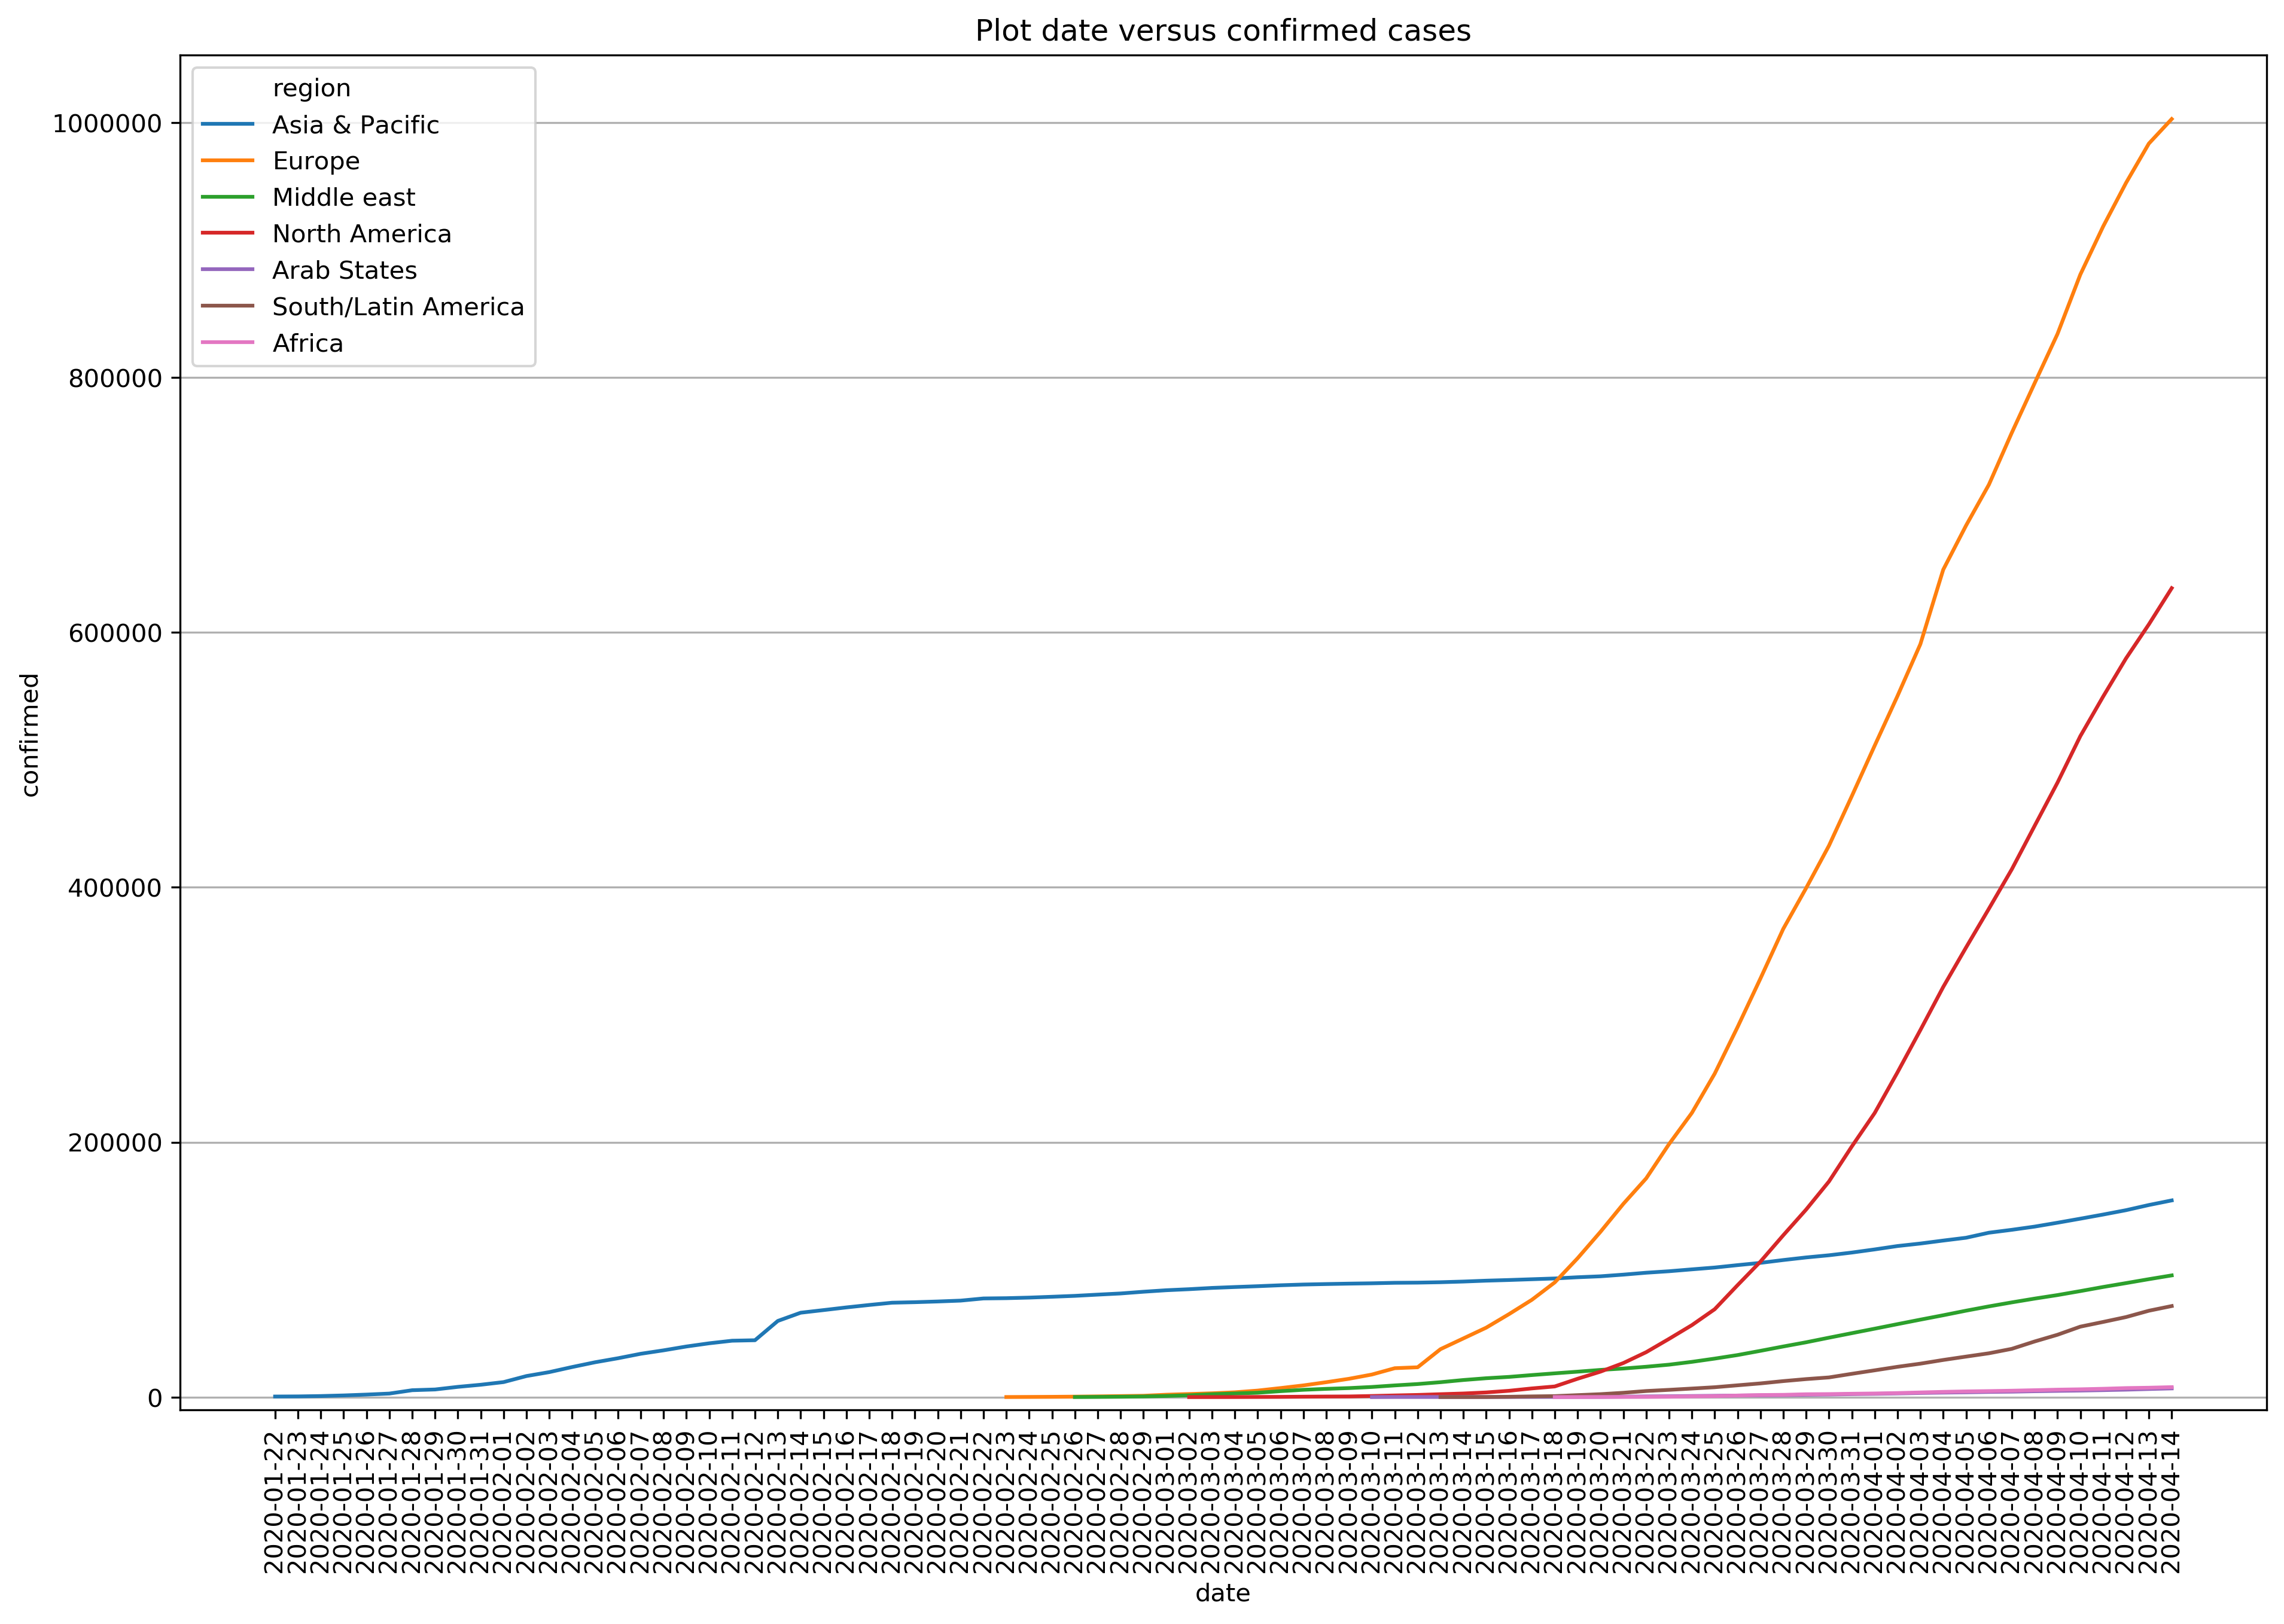

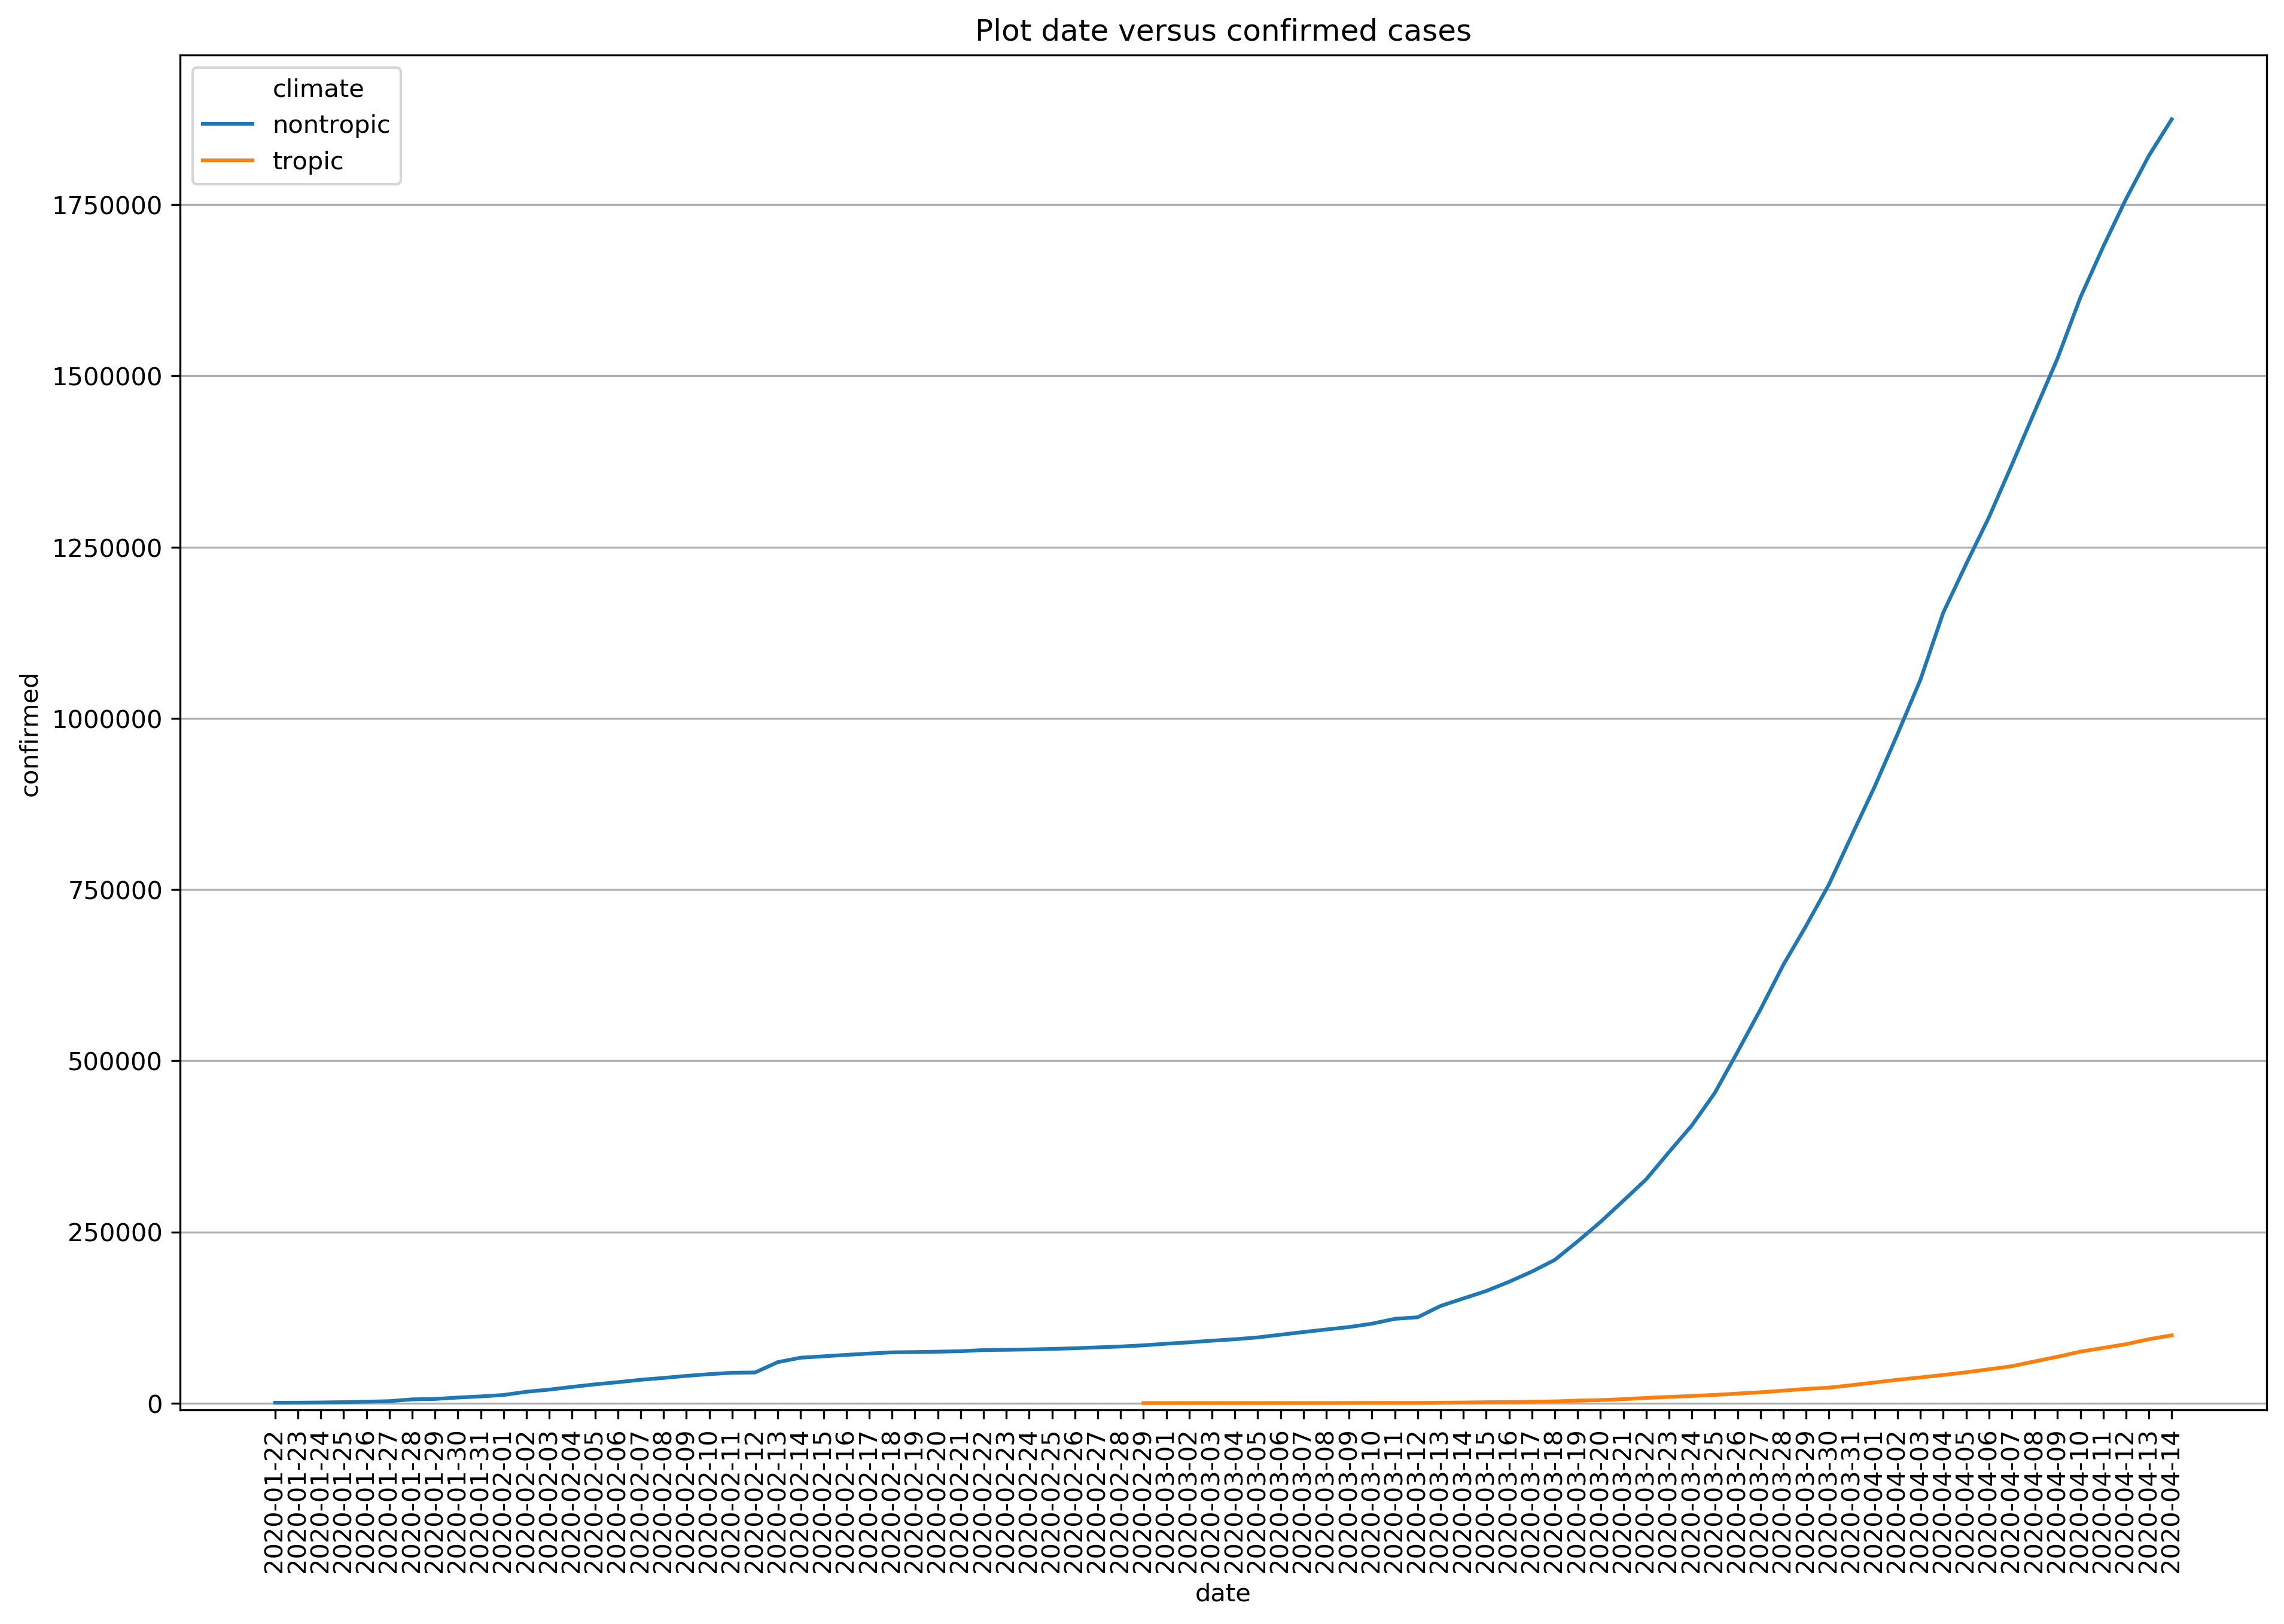

In [11]:
plot_line(confirm_region, 'date', 'confirmed', 'region', )
plot_line(confirm_iklim, 'date', 'confirmed', 'climate')

#### 4.a. Buat dataframe 'df_last' yang hanya mengandung data tanggal terakhir dari 'df_new', di mana tiap row menunjukkan data 'confirmed', 'deaths', 'recovered', 'region', dan 'climate' untuk 1 negara.
#### b. Berdasarkan df_last, identifikasi 10 negara dengan data 'deaths' tertinggi. Buat barplotnya.
#### c. Lakukan visual EDA pada dataframe 'df_last' untuk kolom 'confirmed', 'deaths', dan 'recovered' menggunakan scatter matrix (bedakan warna scatter plot berdasarkan region)
#### d. Lakukan hal yang sama dengan membedakan warna scatter plot berdasarkan iklim

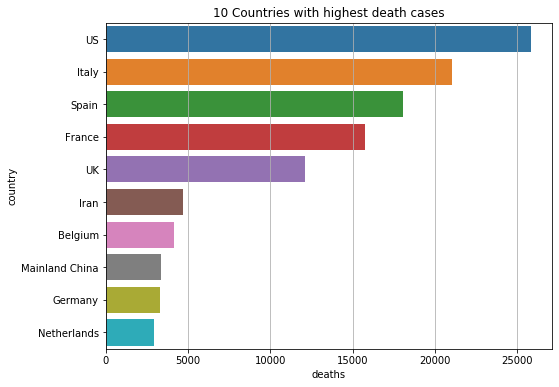

In [12]:
#df_last for each country
last_updated = list((df_new2.reset_index()['date'][-1:]))[0]
df_last = df_new2.reset_index()[df_new2.reset_index()['date'] == last_updated]

#10 most death cases
ten_deathness = df_last.sort_values(by='deaths', ascending=False).head(10)
#ten_deathness
plt.figure(figsize=(8,6))
sns.barplot(x='deaths', y='country', data=ten_deathness, orient='h')
plt.title('10 Countries with highest death cases');
plt.grid(axis='x')

<Figure size 1440x1440 with 0 Axes>

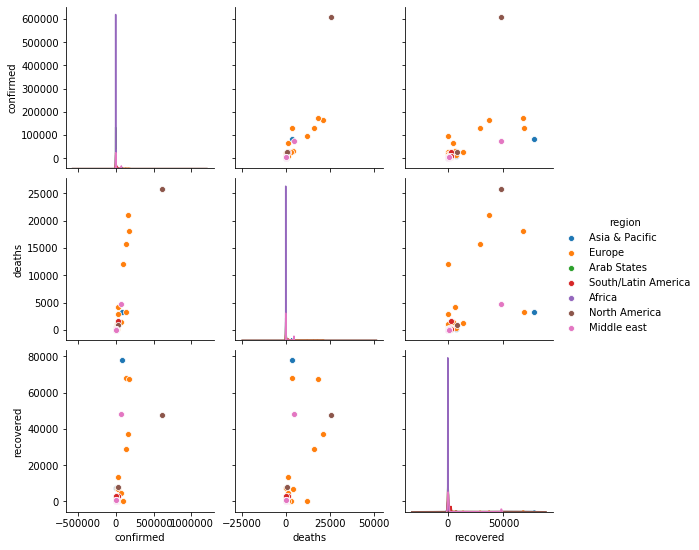

In [13]:
plt.figure(figsize=(20,20))
sns.pairplot(df_last, hue='region');
#pd.plotting.scatter_matrix(df_last);

<Figure size 720x720 with 0 Axes>

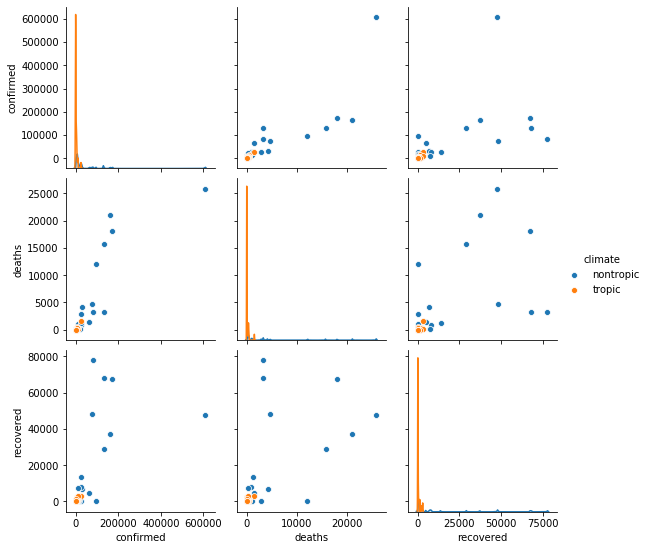

In [14]:
plt.figure(figsize=(10,10))
sns.pairplot(df_last, hue='climate');

#### 5. a. mengacu pada hasil 4.c. dan d., data apa saja yang secara visual terlihat memiliki distribusi normal?
#### b. konfirmasi jawaban 5. a. dengan menggunakan normality test dari modul scipy.

In [15]:
print('5 a. sebagian besar data memiliki distribusi skew ke kanan')

5 a. sebagian besar data memiliki distribusi skew ke kanan


In [16]:
# function to check the distribution
def normal_test_agustino(data, cols= ['confirmed', 'deaths', 'recovered']):
    #cols = ['confirmed', 'deaths', 'recovered']
    z_val = []
    p_val = []
    normal = []
    for col in cols:
        z, p = stats.normaltest(df_last[col])
        z_val.append(z)
        p_val.append(p)
        if p > 0.05:
            normal.append('Normal Distribution')
        else:
            normal.append('Not Normal Distribution')
    normal_test = pd.DataFrame({'stats':z_val, 'p_val':p_val, 'Nomality': normal}, index=cols)
    return normal_test

#check the distribution
normal_test_agustino(df_last)

,stats,p_val,Nomality
confirmed,221.248516,9.046803e-49,Not Normal Distribution
deaths,156.235501,1.185474e-34,Not Normal Distribution
recovered,139.807740,4.376582e-31,Not Normal Distribution


#### 6. Dengan asumsi syarat melakukan independent t-test terpenuhi, lakukan independent t-test untuk menguji adanya hubungan antara kelompok iklim dan data 'confirmed' pada 'df_last'.

In [18]:
tropic = (list(df_last[df_last['climate']=='tropic']['confirmed']))
non_tropic = list(df_last[df_last['climate']=='nontropic']['confirmed'])#[:len(tropic)]
stat, p = stats.ttest_ind(tropic, non_tropic, equal_var=False)
p

0.016170779759047398

#### 7. (Mengacu pada hasil nomor 6) Dengan menentukan nilai alpha=0.05, apakah hipotesis 0 bahwa 'tidak ada hubungan antara kelompok iklim dan data 'Confirmed' dapat ditolak? Apa alasannya?

In [19]:
if p < 0.05:
    print('we can reject the null hypothesis of identical average scores')
else:
    print('we can not reject the null hypothesis of identical average scores')
print('karena nilai p-value kurang dari syarat alpha 0.05')

we can reject the null hypothesis of identical average scores
karena nilai p-value kurang dari syarat alpha 0.05


#### 8. Buatlah model classifier untuk memprediksi region untuk array 'X_new' berdasarkan data 'confirmed', 'deaths', dan 'recovered' yang ada pada 'df_last'. Tampilkan akurasi dari modelnya menggunakan training/test split.

In [20]:
X_new=np.array([[1000,30,200],
       [2000,40,400],
       [50,1,2]])

#drop Nan value for 'other' in country columns beacuse it does not has region and climate and define in datasets climate
df_last.dropna(inplace=True)
#take colomns for training data 
data = df_last.iloc[:, 2:6].reset_index(drop=True)
data.head(3)

,confirmed,deaths,recovered,region
0,714,23,40,Asia & Pacific
1,475,24,248,Europe
2,2070,326,691,Arab States


In [35]:
# train = X
X_t = data.iloc[:, :3].reset_index(drop=True)
X_t.head(2)
# label = y
y = data['region'].reset_index(drop=True)


#split train/test
X_train, X_val, y_train, y_val = train_test_split(X_t, y, stratify=y, test_size=0.1)

#conver label to numeric
#lb = LabelBinarizer()
le = LabelEncoder()
y_train_lb = le.fit_transform(y_train)
y_test = le.transform(y_val)
#y_lb = lb.fit_transform(y)
# lb.inverse_transform(y_lb)

#scaler
scaler = StandardScaler()
#Scaling data
X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_val)

def model_CVscore(clf, X, y):
    #clf = clf.fit(X,y)
    cv = cross_val_score(clf, X, y, cv=2)
    return np.mean(cv)
def models_select(models, X, y):
    val= {}
    for key, value in models.items():
        val[key] = model_CVscore(value, X, y)
    return val

In [37]:
models = {'knn': KNeighborsClassifier(), 'SVC':SVC(), 'RFC': RandomForestClassifier(),
         'DCL': DecisionTreeClassifier(), 'GBC': GradientBoostingClassifier()}

models_select(models, X_train_scal, y_train_lb)

{'knn': 0.4,
 'SVC': 0.37272727272727274,
 'RFC': 0.4181818181818182,
 'DCL': 0.3,
 'GBC': 0.35454545454545455}

In [39]:
#parameter tuning
param = {'n_neighbors': [3, 4, 5, 6, 7,8, 9]}
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param, scoring='accuracy', cv=2)
grid.fit(X_train_scal, y_train)
print('Best Score:', grid.best_score_)
print('Best paramater:', grid.best_estimator_)

Best Score: 0.4181818181818182
Best paramater: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')


In [40]:
#best model could get
model_region = KNeighborsClassifier(n_neighbors=7).fit(X_train_scal, y_train_lb)
print('Training Accuracy', model_region.score(X_train_scal, y_train_lb))
print('Testing Accuracy', model_region.score(X_test_scal, y_test))
print('Prediction label for X_new data', le.inverse_transform(model_region.predict(X_new)))

Training Accuracy 0.5363636363636364
Testing Accuracy 0.38461538461538464
Prediction label for X_new data ['Europe' 'Europe' 'Europe']


#### 9. Buatlah classifier model untuk memprediksi climate untuk array 'X_new' berdasarkan data 'confirmed', 'deaths', dan 'recovered' yang ada pada 'df_last'. Tampilkan nilai akurasi dari modelnya menggunakan training/test split.

In [41]:
from sklearn.linear_model import LogisticRegression
X_new=np.array([[1000,30,200],
       [2000,40,400],
       [50,1,2]])

X_clim = df_last.iloc[:, 2:5].reset_index(drop=True)
y_clim = df_last['climate'].reset_index(drop=True)

#split train/test
X_train, X_val, y_train, y_val = train_test_split(X_clim, y_clim, stratify=y, test_size=0.1)

# conver label to numeric
le_climate = LabelEncoder()
y_train_cl = le_climate.fit_transform(y_train)
y_test_cl = le_climate.transform(y_val)

#scaler
scaler = StandardScaler()
#Scaling data
X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_val)

#model selection
models = {'knn': KNeighborsClassifier(), 'SVC':SVC(), 'RFC': RandomForestClassifier(),
         'DCL': DecisionTreeClassifier(), 'GBC': GradientBoostingClassifier(), 
         'Logi' : LogisticRegression()}

models_select(models, X_train_scal, y_train_cl)

{'knn': 0.6636363636363636,
 'SVC': 0.6727272727272727,
 'RFC': 0.7545454545454546,
 'DCL': 0.7,
 'GBC': 0.7272727272727273,
 'Logi': 0.6727272727272727}

In [42]:
# Parameter Tuning
param = {'n_estimators':[100, 200, 500, 1000], 'max_depth':[2,3,4,5]}
grid = GridSearchCV(RandomForestClassifier(), param_grid=param, scoring='accuracy', cv=2)
grid.fit(X_train_scal, y_train_cl)
print('Best Score: ', grid.best_score_)
print('Best Parameters: ', grid.best_params_)

Best Score:  0.7727272727272727
Best Parameters:  {'max_depth': 2, 'n_estimators': 200}


In [45]:
model_iklim = RandomForestClassifier(max_depth=2, n_estimators=200).fit(X_train_scal, y_train_cl)
print('Training Score: ', model_iklim.score(X_train_scal, y_train_cl))
print('Testing Score: ', model_iklim.score(X_test_scal, y_test_cl))
print('Prediction label for X_new data', le_climate.inverse_transform(model_iklim.predict(X_new)))

Training Score:  0.8090909090909091
Testing Score:  0.8461538461538461
Prediction label for X_new data ['nontropic' 'nontropic' 'nontropic']


#### 10. Buatlah model regresi linear untuk sebaran jumlah 'deaths' di US dari tanggal 20 Maret 2020 - 10 April 2020. Buatlah plot dari model regresi ini. Hitung nilai R^2 dan RMSE dari modelnya menggunakan training/test split.

In [46]:
#reset index and convert it to datetime format
df_new2.reset_index(inplace=True)
df_new2['date'] = pd.to_datetime(df_new2['date'], format='%Y-%m-%d')
df_new2.set_index('date', inplace=True)

#select data for death cases in US between 2020-03-20 to 2020-04-10
df_new = df_new2.loc['2020-03-20' : '2020-04-10']
us = df_new[df_new['country'] == 'US']['deaths']

#split train/test data
X = np.arange(0, len(us.index),1) #change date number into array for X value in Linier regression
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1,1), us.values.reshape(-1,1))

#model linier regresi
lr = LinearRegression()
model = lr.fit(X_train, y_train)
print('Training R^2 Score: ', r2_score(y_train, model.predict(y_train)))
print('Training RMSE Score: ', np.sqrt(mean_squared_error(y_train, model.predict(y_train))))
print('Testing R^2 Score: ', r2_score(y_test, model.predict(y_test)))
print('Testing RMSE Score: ', np.sqrt(mean_squared_error(y_test, model.predict(y_test))))

Training R^2 Score:  -1712379.389850575
Training RMSE Score:  7836871.550919328
Testing R^2 Score:  -1747677.9247979121
Testing RMSE Score:  5667470.614792848


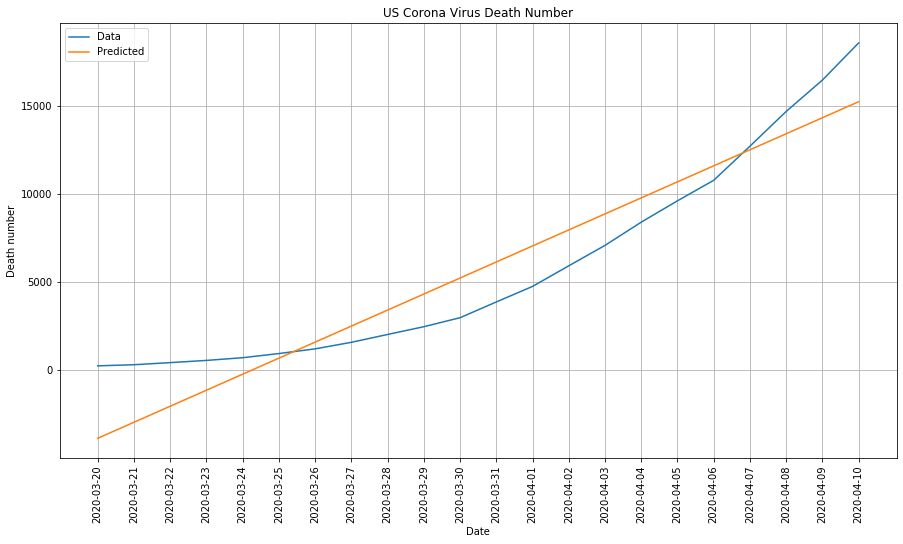

In [47]:
plt.figure(figsize=(15,8))
plt.plot(X, us.values, label='Data')
plt.plot(X, lr.predict(X.reshape(-1,1)), label='Predicted')
plt.title('US Corona Virus Death Number');
plt.xticks(ticks=np.arange(len(X)), labels=us.reset_index()['date'].dt.date, rotation=90);
plt.legend(); plt.xlabel('Date'); plt.ylabel('Death number')
plt.grid()
plt.show();

#### 11. Buatlah clustering model dengan jumlah cluster sebanyak 5 (cluster 0-4) untuk array 'Z'. Sebutkan prediksi nomor cluster berdasarkan data 'confirmed', 'deaths', dan 'recovered' pada 'df_last' untuk negara:
<br>
a. Indonesia
<br>
b. Singapore
<br>
c. US
<br>
d. Italy
<br>
e. Iran

In [48]:
Z=df_last.loc[:,['confirmed','recovered','deaths']].values

In [49]:
# scale data Z 
scaler = StandardScaler()
Z_scal = scaler.fit_transform(Z)

#clustering model with 5 number of cluster
clust = KMeans(n_clusters=5)
clust.fit(Z_scal)

#save cluster number into dataframe
Z_new = df_last.iloc[:,1:-2].reset_index(drop=True)
Z_new['Cluster_N'] = clust.labels_

In [50]:
country = ['Indonesia', 'Singapore', 'US', 'Italy', 'Iran']
[Z_new[Z_new['country'] == i] for i in country]

[      country  confirmed  deaths  recovered  Cluster_N
 50  Indonesia       4839     459        426          1,
        country  confirmed  deaths  recovered  Cluster_N
 101  Singapore       3252      10        611          1,
     country  confirmed  deaths  recovered  Cluster_N
 116      US     607670   25832      47763          2,
    country  confirmed  deaths  recovered  Cluster_N
 55   Italy     162488   21067      37130          4,
    country  confirmed  deaths  recovered  Cluster_N
 51    Iran      74877    4683      48129          3]